In [1]:
import scanpy as sc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:

import statannot


# read in granuloma, BAL, uninvolved CD4 depletion, reinfection data

In [3]:
adata= sc.read('../datasets/adata_CellBender_Post_Doublet_Removal_30July2023.h5ad')

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


# evaluate WGCNA modules

In [4]:
top50hub_genes=pd.read_csv('../datasets/subclustering_objects/fibroblast_hgWGCNA_50hubGenes.csv', index_col=0)

In [5]:
top50hub_genes.head()

,gene_name,module,kME
1,ADRA2A,Fibroblast-M1,0.398358
2,MAP4K4,Fibroblast-M1,0.398991
3,GREM1,Fibroblast-M1,0.399769
4,ANGPTL2,Fibroblast-M1,0.407116
5,COL6A5,Fibroblast-M1,0.411539


In [6]:
module_assignment=pd.read_csv('../datasets/subclustering_objects/fibroblast_hgWGCNA_moduleAssignment.csv', index_col=0)

In [7]:
module_assignment.head()

,gene_name,module,color,kME_Fibroblast-M1,kME_Fibroblast-M2,kME_Fibroblast-M3,kME_grey,kME_Fibroblast-M4,kME_Fibroblast-M5,kME_Fibroblast-M6,kME_Fibroblast-M7
MMP1,MMP1,Fibroblast-M1,blue,0.883524,-0.075759,-0.338115,-0.072136,-0.301665,-0.071461,-0.033339,-0.021164
POSTN,POSTN,Fibroblast-M1,blue,0.729653,-0.094909,-0.414127,-0.098510,-0.119679,-0.087924,-0.011920,-0.035449
MMP3,MMP3,Fibroblast-M1,blue,0.445586,-0.036960,-0.152908,-0.033880,-0.146025,-0.037011,-0.012265,0.001133
CXCL13,CXCL13,Fibroblast-M1,blue,0.584850,-0.046823,-0.204800,-0.041965,-0.188330,-0.044406,-0.016500,-0.020330
S100A9,S100A9,Fibroblast-M2,yellow,-0.094426,0.753104,0.103408,0.319426,-0.101942,0.259269,0.067748,0.184646


In [8]:
top50hub_genes_dict={x:top50hub_genes.loc[top50hub_genes.module==x,'gene_name'].values for x in top50hub_genes.module.unique()}

In [9]:
adata.raw.X.shape

(220195, 27489)

In [10]:
for module in top50hub_genes_dict.keys():
    sc.tl.score_genes(adata, gene_list=top50hub_genes_dict[module], score_name=module, use_raw=True)

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


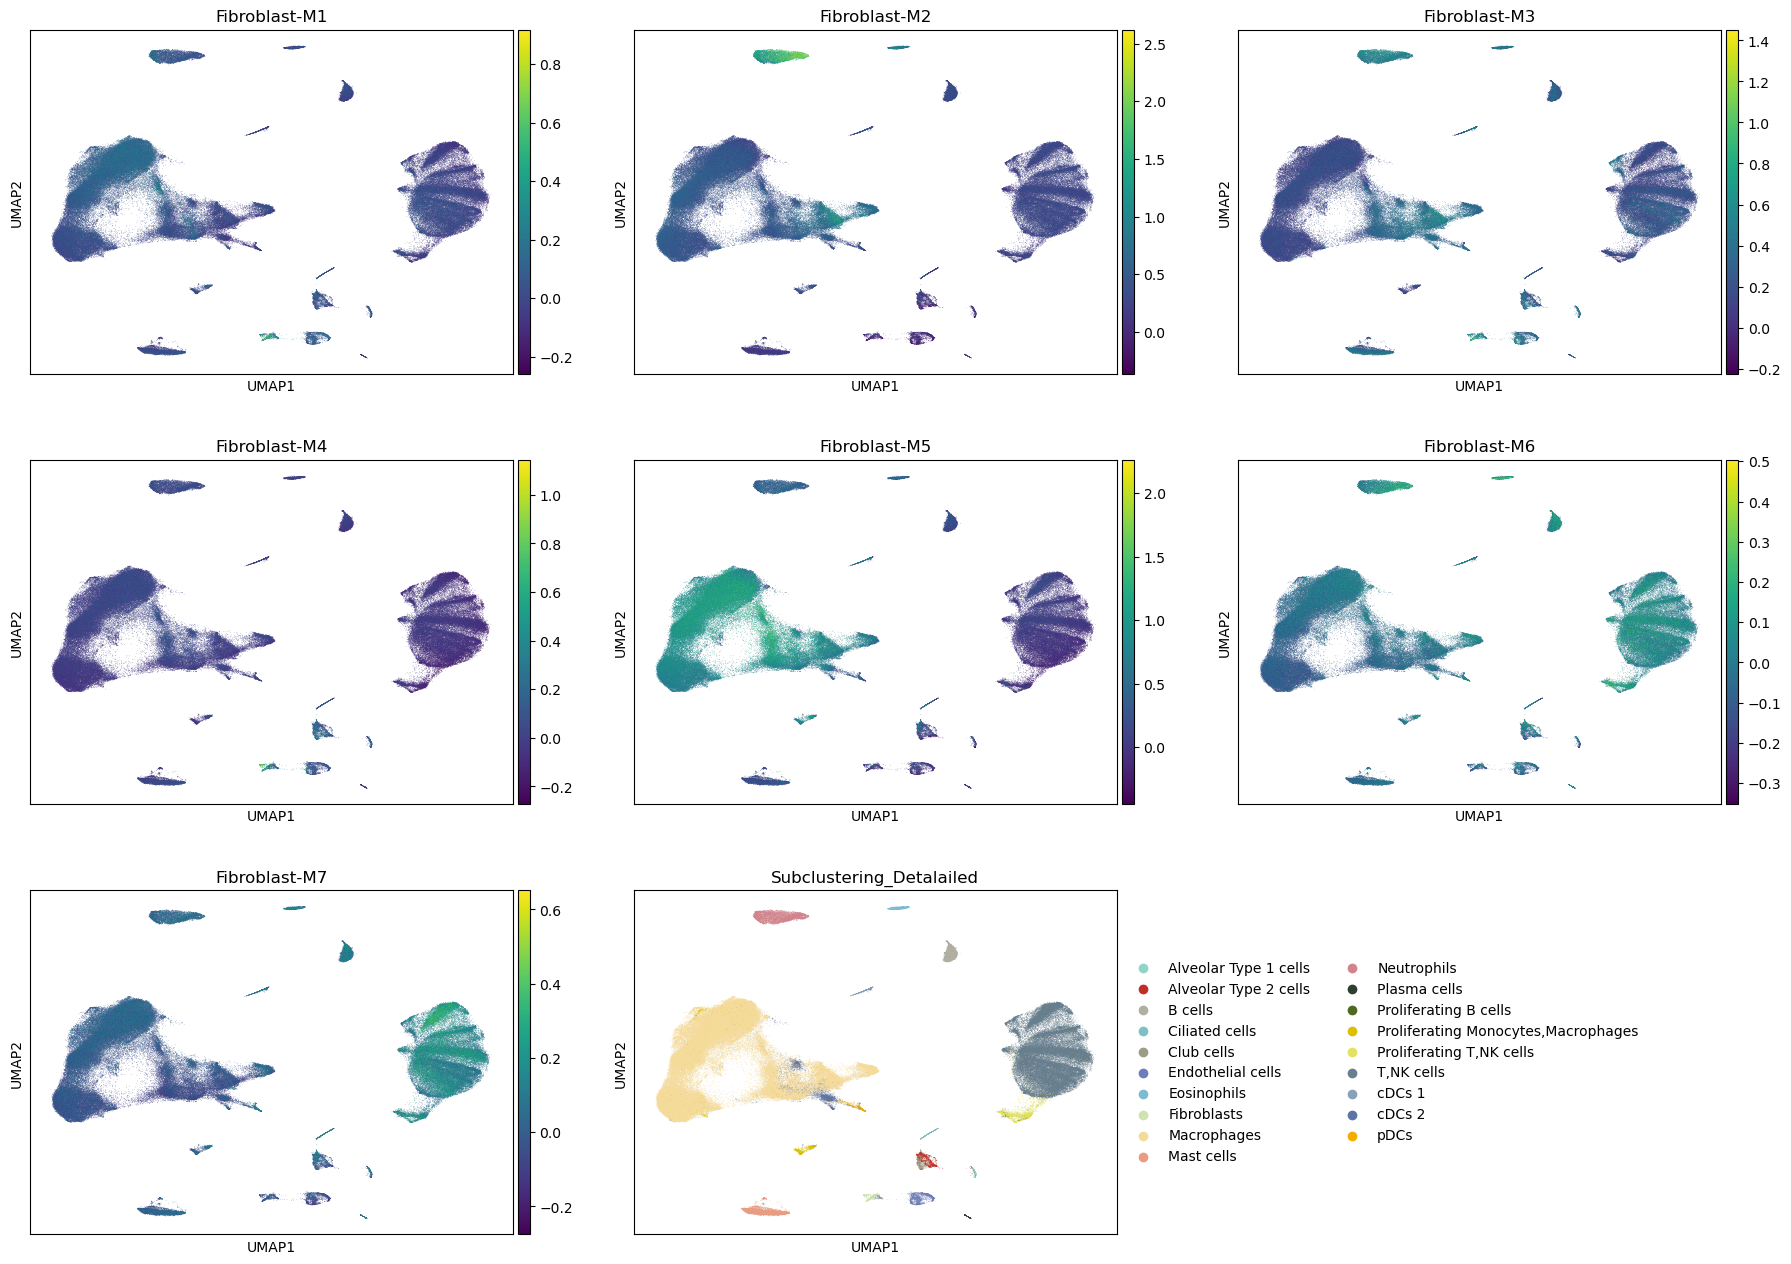

In [11]:
f =sc.pl.umap(adata, color=list(top50hub_genes_dict.keys())+['Subclustering_Detalailed'], ncols=3, return_fig=True)




# compare naive gran and uninvolved lung

In [12]:
NHP_fib = adata[adata.obs.Subclustering_Detalailed=='Fibroblasts']
NHP_fib_naive = NHP_fib[(NHP_fib.obs.Group.isin(['Naïve']))]

In [13]:
NHP_fib_naive.obs['Group_type']=NHP_fib_naive.obs['Group'].astype('str')+'_'+NHP_fib_naive.obs['Sample type'].astype('str')

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_55106/1486677446.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  NHP_fib_naive.obs['Group_type']=NHP_fib_naive.obs['Group'].astype('str')+'_'+NHP_fib_naive.obs['Sample type'].astype('str')


In [14]:
score_df= NHP_fib_naive.obs[['Group','Sample type', 'Fibroblast-M1']]
score_df.reset_index(inplace=True)
score_df.rename(columns={'index':'barcode'}, inplace=True)
df2plot=pd.melt(score_df, id_vars=['barcode','Sample type','Group'])

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_55106/1388942755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.rename(columns={'index':'barcode'}, inplace=True)


In [15]:
df2plot

,barcode,Sample type,Group,variable,value
0,13918_Array11Granul_CATAACATTCCC,Granuloma,Naïve,Fibroblast-M1,0.537971
1,13918_Array11Granul_GAGAACGTACTG,Granuloma,Naïve,Fibroblast-M1,0.481478
2,13918_Array11Granul_GTCTTCATGGGT,Granuloma,Naïve,Fibroblast-M1,0.242546
3,13918_Array11Granul_GACTTTTACGTT,Granuloma,Naïve,Fibroblast-M1,0.420792
4,13918_Array11Granul_GCTACACTGATG,Granuloma,Naïve,Fibroblast-M1,0.217677
...,...,...,...,...,...
451,13918_Array9Granulo_GTTTATGGATAG,Granuloma,Naïve,Fibroblast-M1,0.190283
452,13918_Array9Granulo_ACGGAAATCGTG,Granuloma,Naïve,Fibroblast-M1,0.284256
453,13918_Array9Granulo_ATAACCATCGGA,Granuloma,Naïve,Fibroblast-M1,0.041673
454,13918_Array9Granulo_CCCACGCTGAGG,Granuloma,Naïve,Fibroblast-M1,0.444496


/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

[(('Naïve', 'Granuloma'), ('Naïve', 'Uninvolved'))]


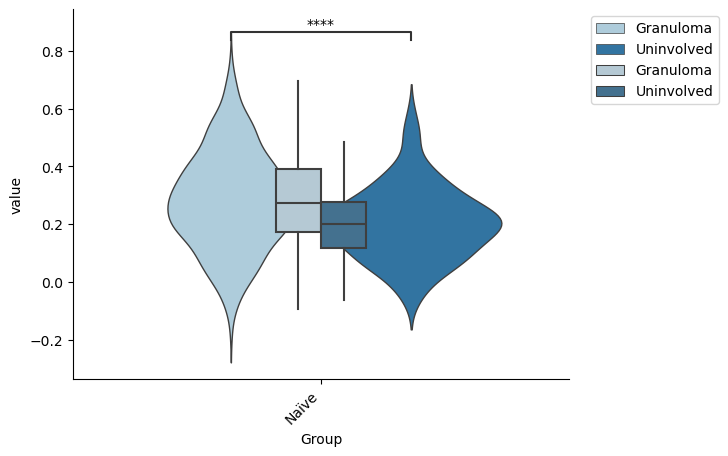

In [17]:
a=sns.violinplot(data=df2plot, x='Group', y='value',hue='Sample type',  linewidth=1, inner=None, palette='Paired')           
sns.boxplot(data=df2plot, x='Group', y='value',hue='Sample type', saturation=0.5, width=0.2,showfliers=False,showcaps=False,
            palette='Paired', boxprops={'zorder': 2}, ax=a)         
box_pairs=[]

box_pairs.append( (( 'Naïve', "Granuloma"), ('Naïve',"Uninvolved")))
    
print(box_pairs)



statannot.add_stat_annotation(
    a,
    data=df2plot,
    x="Group", y="value", hue='Sample type',
    box_pairs=box_pairs,
    test="Mann-Whitney",
    text_format="star", verbose=0
)
plt.xticks(rotation=45, ha='right')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
sns.despine()
plt.savefig('figures/DE_cd4_depl_fibroblast_naive_mannwhitneyU_wgcna.pdf', dpi=300, bbox_inches='tight')